In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

import joblib

In [16]:
df = joblib.load('../data/read_water-test/out_df-data.pkl')

In [28]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,pocam_index,pocam_string,pocam_om,string,om,dist,zenith,abs,sca,domeff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,1.0,923.466805,0.035038,0.5,0.5,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,2.0,906.457459,0.035696,0.5,0.5,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,3.0,889.448489,0.036379,0.5,0.5,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,4.0,872.439981,0.037089,0.5,0.5,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,5.0,855.431929,0.037826,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,93.0,64.0,86.0,56.0,133.701543,2.728592,1.5,1.5,1.5
102056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,93.0,64.0,86.0,57.0,140.141153,2.748641,1.5,1.5,1.5
102057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,93.0,64.0,86.0,58.0,146.641422,2.766947,1.5,1.5,1.5
102058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,93.0,64.0,86.0,59.0,153.186679,2.783694,1.5,1.5,1.5


In [48]:
params = np.load('../data/read_water-test/PARAMS.npy', allow_pickle=True, encoding='latin1').item()

grid       = params['grid']
pocams     = params['pocams']
stringoms  = params['oms']
zeniths    = params['zenith'] 
distances  = params['distance']
n_data     = 5000 # bins
n_pocam    = len(pocams)

In [49]:
# vectorize
pocs_i = np.zeros(( n_pocam, 2 ))
pocs   = np.zeros(( len(stringoms) * n_pocam, 3 ))
geo    = np.zeros(( len(stringoms) * n_pocam, 4 ))

cntr = 0
for pi, p in enumerate(pocams):
    poc    = p.decode('utf-8')
    # get key
    ps, po = [int(i) for i in poc.split('-')]
    # put to array
    pocs_i[pi] = [ps, po]
    for so in stringoms:
        # get key
        s, o   = [int(i) for i in so.split('-')]
        key    = '%s_%s-%s' %(poc, s, o)
        # put to array
        pocs[cntr] = [pi, ps, po]
        geo[cntr] = [ps, po, s, o]
        # increment
        cntr += 1

In [50]:
ps, po = pocs_i[0]
gp     = [1., 1., 1.]

m_poc = (df['pocam_string'] == ps) & (df['pocam_om'] == po)
m_gp  = (df['abs'] == gp[0]) & (df['sca'] == gp[1]) & (df['domeff'] == gp[2])

select_pocam = df.loc[m_poc & m_gp]
select_pocam

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,pocam_index,pocam_string,pocam_om,string,om,dist,zenith,abs,sca,domeff
49140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,1.0,923.466805,0.035038,1.0,1.0,1.0
49141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,2.0,906.457459,0.035696,1.0,1.0,1.0
49142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,3.0,889.448489,0.036379,1.0,1.0,1.0
49143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,4.0,872.439981,0.037089,1.0,1.0,1.0
49144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,36.0,5.0,855.431929,0.037826,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,86.0,56.0,82.134636,2.232368,1.0,1.0,1.0
49676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,86.0,57.0,86.611423,2.296181,1.0,1.0,1.0
49677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,86.0,58.0,91.412611,2.353591,1.0,1.0,1.0
49678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,84.0,86.0,59.0,96.484591,2.405122,1.0,1.0,1.0


In [65]:
d_colums = ['x%i' %i for i in range(n_data)]

Text(0, 0.5, 'Photons')

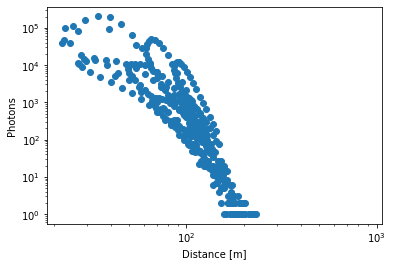

In [75]:
ps, po = pocs_i[1]
gp     = [0.5, 0.5, 1.]

plt.figure()

m_poc = (df['pocam_string'] == ps) & (df['pocam_om'] == po)
m_gp  = (df['abs'] == gp[0]) & (df['sca'] == gp[1]) & (df['domeff'] == gp[2])

select = df.loc[m_poc & m_gp]
d      = select['dist']
bins   = select_pocam[d_colums].values
q      = np.sum(bins, axis=1)

plt.plot(d, q, marker='o', ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance [m]')
plt.ylabel('Photons')